<a href="https://colab.research.google.com/github/hoonzi-s/hongong_mldl/blob/main/03-1.%20K-%EC%B5%9C%EA%B7%BC%EC%A0%91%20%EC%9D%B4%EC%9B%83%20%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

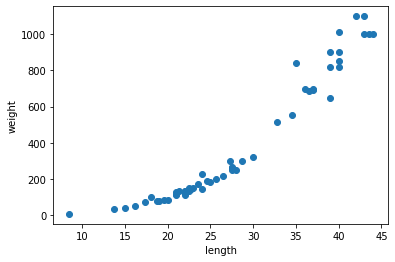

In [5]:
# 데이터가 어떤 형태를 띠는지 그려본다

import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [11]:
# 훈련 세트, 테스트 세트 나누기

from sklearn.model_selection import train_test_split as tts

train_input, test_input, train_target, test_target = tts(perch_length, perch_weight, random_state = 42)

train_input

array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
       22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
       36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
       22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

In [13]:
# 각 데이터셋은 2차원 배열이어야 함.
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
train_target = train_target.reshape(-1, 1)
test_target = test_target.reshape(-1, 1)

In [16]:
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(42, 1) (14, 1)
(42, 1) (14, 1)


In [18]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
knr.score(test_input, test_target)

0.992809406101064

In [19]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차 계산
mae = mean_absolute_error(test_target,test_prediction)
mae

19.157142857142862

In [21]:
# 훈련 세트로 R^2 점수 확인
knr.score(train_input, train_target)

0.9698823289099254

In [24]:
# 훈련 세트 점수 < 테스트 세트 점수 --> 과소적합
# 훈련 세트 점수 > 테스트 세트 점수 --> 과대적합
# 지금은 과소적합이니까 모델을 더 복잡하게 만드면 된다 --> 이웃 개수를 줄인다

knr.n_neighbors = 3   # 기본값은 5
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609


In [25]:
# 훈련 세트 점수가 더 높으니 과대적합이고 테스트 세트 점수도 낮지 않으니 적당한 모델이라고 판단
# 일반적으로 훈련 세트의 점수가 테스트 세트 점수보다 조금 더 높다.

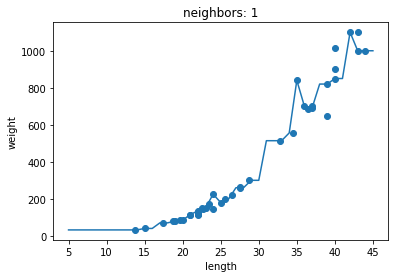

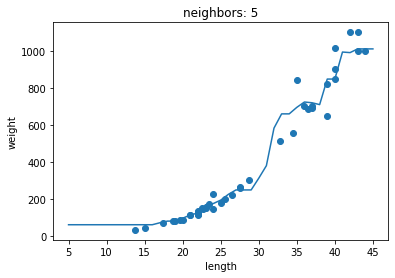

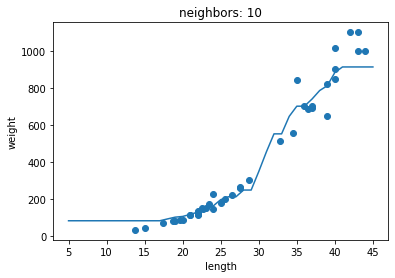

In [32]:
knr = KNeighborsRegressor()
x = np.arange(5, 46).reshape(-1, 1)

for n in [1, 5, 10]:
  knr.n_neighbors = n
  knr.fit(train_input, train_target)  # 훈련
  prediction = knr.predict(x)         # 지정한 x 범위에 따른 결과 예측

  plt.scatter(train_input, train_target)
  plt.plot(x, prediction)
  plt.title(f'neighbors: {n}')
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()